In [15]:
from selenium import webdriver
import matplotlib.pyplot as plt
import time
from tkinter import*
from wordcloud import WordCloud
import jieba
def eat():   
    food_name=food_name_input.get()  ##獲取使用者輸入的品名
    chrome_browser = webdriver.Chrome() ##自動化瀏覽器會依據品項爬取內容
    chrome_browser.get("https://www.mcdonalds.com/tw/zh-tw/full-menu.html")
    link=chrome_browser.find_element_by_link_text(food_name)
    link.click()##讓滑鼠點入對應的品名
    time.sleep(1) ##等待一秒鐘
    title=chrome_browser.find_elements_by_class_name("copy") ##根據class去爬取卡洛里資料
    time.sleep(10)##等待10秒鐘讓使用者瀏覽
    text.insert(END,title[1].text,food_name) ##將搜尋內容顯示在tkinter上
    chrome_browser.close()   ##關閉chrome頁面
    
def main():
    global food_name_input,text,A,background,b,a##將這些設定為全域參數
    background=Tk()      
    background.title("麥當勞成分查詢") 
    background.geometry("750x350")       
    Label(background,text='請輸入想吃的東西,且正確的品名：',font=("微軟雅黑",18),fg='black').grid() 
    food_name_input=Entry(background,font=("微軟雅黑",15))
    food_name_input.grid(row=0,column=1) 
    text=Listbox(background,font=("微軟雅黑",15),width=45,height=10)
    
    var1=IntVar()
    Checkbutton(background,text="請注意搜尋雞請更正為鷄",variable=var1).grid(row=1,column=2,sticky=W)
    text.grid(row=1,columnspan=2)
    Button(background,text="搜尋",font=("微軟雅黑",15),command=eat).grid(row=0,column=2,sticky=W) 
    ##將搜尋按鈕和eat函示連結
    Button(background,text="離開",font=("微軟雅黑",15),command=background.quit).grid(row=2,column=1,sticky=E)
    ##將離開按鈕設定為點擊關閉連結
    Button(background,text="下載麥當勞文字雲",font=("微軟雅黑",15),command=download).grid(row=2,column=2,sticky=E)
    ##將下載按鈕和download函示連結
    mainloop() 
def download():
    jieba.load_userdict('dict.txt.big')
    chrome_browser = webdriver.Chrome()
    chrome_browser.get("https://www.mcdonalds.com/tw/zh-tw/full-menu.html")
    time.sleep(1)
    a=[]
    for i in range(1,138): ###總共有137個品項 將每一個名稱一一爬取下來
        title=chrome_browser.find_elements_by_xpath(f'//*[@id="maincatcontent"]/div/ul/li[{i}]/a/div/div[2]/span[2]')
        for j in title:
            a.append(j.text)
    A=str(a)
    b={}
    for ch in A: ##去除符號等多餘字元
        if ch in "+'$HappyMealOreo30612/()BLTRE48]z一[,":
            A=A.replace(ch,'') ##以空白代替
    for x in A: ##計算各中文字出現字數
        b[x]=A.count(x) 
    wc = WordCloud(font_path="NotoSansTC-Bold.otf",   ##文字雲繪圖，font_path是字型的樣式，backgroung設定為白色，最多字數為200
                   background_color="white", 
                   max_words = 200)      
    wc.generate_from_frequencies(b)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(50, 50), dpi = 600) ##設定尺寸
    plt.show()
    wc.to_file('output.jpg') ##設定檔名
    chrome_browser.close() ##將麥當勞頁面關閉

###麥香鷄


<ipython-input-15-05e45cb1fc84>:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  link=chrome_browser.find_element_by_link_text(food_name)
<ipython-input-15-05e45cb1fc84>:14: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  title=chrome_browser.find_elements_by_class_name("copy") ##根據class去爬取卡洛里資料
<ipython-input-15-05e45cb1fc84>:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  link=chrome_browser.find_element_by_link_text(food_name)
<ipython-input-15-05e45cb1fc84>:14: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  title=chrome_browser.find_elements_by_class_name("copy") ##根據class去爬取卡洛里資料
<ipython-input-15-05e45cb1fc84>:46: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  title=chrome_browser.find_elements_by_xpath(f'//*[@id="

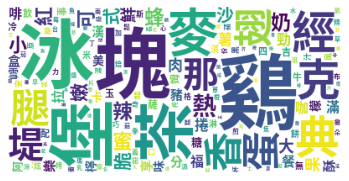

<Figure size 30000x30000 with 0 Axes>

In [16]:
main()                                                

In [46]:
chrome_browser = webdriver.Chrome()
chrome_browser.get("https://www.mcdonalds.com/tw/zh-tw/full-menu.html")
time.sleep(1)
a=[]
for i in range(1,138):
    title=chrome_browser.find_elements_by_xpath(f'//*[@id="maincatcontent"]/div/ul/li[{i}]/a/div/div[2]/span[2]')
    for j in title:
        a.append(j.text)
A=str(a)
b={}
print(b)
for ch in A: ##去除符號等多餘字元
    if ch in "+'$HappyMealOreo30612/()BLTRE48]z一[,":
        A=A.replace(ch,'') ##以空白代替
for x in A: ##計算各中文字出現字數
    b[x]=A.count(x) 
 
print(A)


<ipython-input-46-5f6d913862e3>:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  title=chrome_browser.find_elements_by_xpath(f'//*[@id="maincatcontent"]/div/ul/li[{i}]/a/div/div[2]/span[2]')


滿福堡 大麥克  安格斯黑牛堡 經典配餐：中薯冷熱飲 麥脆鷄腿分享盒塊 四塊麥克鷄塊  吉事漢堡可樂小 義式濃縮咖啡 漢堡 豬肉滿福堡 雙層牛肉吉事堡  辣脆鷄腿堡 清爽配餐：四季沙拉大冷熱飲 酥嫩鷄翅分享盒 漢堡  法式芥末香鷄堡熱紅茶小 經典美式咖啡 吉事漢堡 豬肉滿福堡加蛋 嫩煎鷄腿堡  嫩煎鷄腿堡 勁脆配餐：麥脆鷄腿塊棒腿或大腿冷熱飲 勁辣香鷄翅分享盒 陽光鱈魚堡  四塊麥克鷄塊玉米湯小 冰摩卡 薯條 無敵豬肉滿福堡加蛋 麥香鷄 蕈菇安格斯黑牛堡 炫冰配餐：冰炫風小薯冷熱飲 麥克鷄塊分享盒塊 酥嫩鷄翅份兩塊可樂小 冰經典美式咖啡 薯餅 香鷄滿福堡加蛋 麥克鷄塊塊 凱撒辣脆鷄沙拉 豪吃配餐：六塊麥克鷄塊小薯冷熱飲 麥克鷄塊分享盒塊 勁辣香鷄翅份兩塊冰紅茶檸檬風味小 熱摩卡 勁辣香鷄翅塊 香鷄滿福堡 麥克鷄塊塊 義式烤鷄沙拉 鷄塊鷄腿分享盒 大蛋捲冰淇淋雪碧小 經典卡布奇諾 勁辣香鷄翅塊 青蔬滿福堡 勁辣鷄腿堡 蘋果派熱紅茶小 焦糖瑪琪朵 酥嫩鷄翅塊 香鷄蛋堡 原味麥脆鷄翅塊 薯條小包雪碧小 冰焦糖瑪琪朵 酥嫩鷄翅塊 吉事蛋堡 辣味麥脆鷄翅塊 經典那堤 蘋果派 豬肉蛋堡 原味麥脆鷄腿塊 冰經典那堤 玉米杯 火腿蛋堡 辣味麥脆鷄腿塊 香草那堤 四季沙拉大 豬肉鬆餅 麥香魚 冰香草那堤 水果袋 鬆餅片 薑燒豬肉長堡 蜂蜜那堤 玉米湯 經典大早餐 煙燻鷄肉長堡 冰蜂蜜那堤 冰經典美式咖啡 鷄塊鬆餅大早餐 蕈菇安格斯黑牛堡 蜂蜜紅茶 經典美式咖啡 培根番茄嫩蛋焙果堡  安格斯黑牛堡 冰蜂蜜奶茶 經典那堤 起司番茄嫩蛋焙果堡  辣脆鷄腿堡 阿薩姆鮮奶茶 冰經典那堤 現烤焙果  嫩煎鷄腿堡 冰阿薩姆鮮奶茶 經典卡布奇諾 凱撒辣脆鷄沙拉 熱巧克力 蜂蜜那堤 義式烤鷄沙拉 冰巧克力 冰蜂蜜那堤 蜂蜜檸檬冰沙 蜂蜜紅茶 芒果檸檬冰沙 冰蜂蜜奶茶 野莓檸檬冰沙 熱紅茶 原味可頌 阿薩姆鮮奶茶 巧克力榛果可頌 冰阿薩姆鮮奶茶 肉桂捲 熱奶茶 葡萄乾卡士達捲 冰奶茶 藍莓麥片丹麥捲 鮮乳 台灣鮮榨柳丁汁 柳橙汁 可口可樂 可口可樂 雪碧 冰檸檬紅茶 冰無糖紅茶 冰無糖綠茶 蛋捲冰淇淋 大蛋捲冰淇淋 冰心雪糕 冰炫風 麥克鷄塊塊 麥克鷄塊塊 麥克鷄塊塊


In [49]:
chrome_browser = webdriver.Chrome()
chrome_browser.get("https://www.mcdonalds.com/tw/zh-tw/full-menu.html")
time.sleep(1)
a=[]
for i in range(1,138):
    title=chrome_browser.find_elements_by_xpath(f'//*[@id="maincatcontent"]/div/ul/li[{i}]/a/div/div[2]/span[2]')
    for j in title:
        a.append(j.text)
A=str(a)
b={}
for x in A: 
    b[x]=A.count(x) 
print(b)
chrome_browser.close()

<ipython-input-49-a7e333a56b30>:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  title=chrome_browser.find_elements_by_xpath(f'//*[@id="maincatcontent"]/div/ul/li[{i}]/a/div/div[2]/span[2]')


{'[': 1, "'": 274, '滿': 7, '福': 7, '堡': 32, ',': 136, ' ': 145, '大': 8, '麥': 21, '克': 14, 'B': 6, 'L': 6, 'T': 6, '安': 4, '格': 4, '斯': 4, '黑': 4, '牛': 5, '經': 12, '典': 12, '配': 5, '餐': 7, '：': 5, '中': 1, '薯': 6, '+': 15, '$': 5, '3': 7, '8': 5, '冷': 5, '/': 5, '熱': 11, '飲': 5, '脆': 11, '鷄': 43, '腿': 14, '分': 6, '享': 6, '盒': 6, '(': 34, '6': 5, '塊': 34, ')': 34, '四': 4, 'H': 3, 'a': 6, 'p': 6, 'y': 3, 'M': 3, 'e': 5, 'l': 3, '吉': 4, '事': 4, '漢': 4, '可': 8, '樂': 4, '小': 11, '義': 3, '式': 8, '濃': 1, '縮': 1, '咖': 5, '啡': 5, '豬': 6, '肉': 9, '雙': 1, '層': 1, '辣': 11, '清': 1, '爽': 1, '季': 2, '沙': 9, '拉': 6, '酥': 4, '嫩': 9, '翅': 10, '法': 1, '芥': 1, '末': 1, '香': 12, '紅': 8, '茶': 17, '美': 4, '加': 3, '蛋': 12, '煎': 3, '勁': 6, '一': 3, '棒': 1, '或': 1, '陽': 1, '光': 1, '鱈': 1, '魚': 2, '玉': 3, '米': 3, '湯': 2, '冰': 29, '摩': 2, '卡': 5, '條': 2, '無': 3, '敵': 1, '蕈': 2, '菇': 2, '炫': 3, '風': 3, 'O': 3, 'r': 2, 'o': 2, '2': 7, '0': 4, '份': 2, '兩': 2, '餅': 4, '凱': 2, '撒': 2, '豪': 1, '吃': 1, '六': 1, '檸': 5, '檬': 